<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

# 실습 내용

- 다양한 알고리즘으로 모델을 만들고 성능을 비교합니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

%config InlineBackend.figure_format = 'retina'
# warnings.filterwarnings(action='ignore')

In [2]:
# 데이터 불러오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/admission_simple.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [3]:
# 데이터 살펴보기
data.head()

,GRE,TOEFL,RANK,SOP,LOR,GPA,RESEARCH,ADMIT
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


In [4]:
# 기초통계정보 확인
data.describe()

,GRE,TOEFL,RANK,SOP,LOR,GPA,RESEARCH,ADMIT
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.436000
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.496384
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.000000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,1.000000


# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) x, y 분리**

In [5]:
# target 확인
target = 'ADMIT'

# 데이터 분리
x = data.drop(target, axis=1)
y = data[target] 

**2) 정규화**

In [6]:
# 정규화
x = (x - x.min()) / (x.max() - x.min())

**3) 학습용, 평가용 데이터 분리**

In [7]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)

# 4.모델링

- 본격적으로 모델을 선언하고 학습하고 평가하는 과정을 진행합니다.
- 다양한 알고리즘으로 모델을 만들고 성능을 확입니다.
- 성능 평가는 confusion_matrix, classification_report를 사용합니다.
- 사용할 알고리즘을 모두 불러옵니다.

In [9]:
# xgboost 설치
# !pip install xgboost

In [ ]:
# lightgbm 설치
# !pip install lightgbm

In [10]:
# 라이브러리 불러오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import *

**1) KNN**

- KNN 알고리즘으로 모델링하고 성능을 확인합니다.

In [11]:
# 선언하기
model = KNeighborsClassifier(n_neighbors=5)

In [12]:
# 학습하기
model.fit(x_train, y_train)

KNeighborsClassifier()

In [13]:
# 예측하기
y_pred = model.predict(x_test)

In [14]:
# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[75  8]
 [ 7 60]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.91        83
           1       0.88      0.90      0.89        67

    accuracy                           0.90       150
   macro avg       0.90      0.90      0.90       150
weighted avg       0.90      0.90      0.90       150



**2) Decision Tree**

- Decision Tree 알고리즘으로 모델링하고 성능을 확인합니다.

In [15]:
# 선언하기
model = DecisionTreeClassifier(max_depth=5, random_state=2022)

In [16]:
# 학습하기
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=2022)

In [17]:
# 예측하기
y_pred = model.predict(x_test)

In [18]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[74  9]
 [12 55]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88        83
           1       0.86      0.82      0.84        67

    accuracy                           0.86       150
   macro avg       0.86      0.86      0.86       150
weighted avg       0.86      0.86      0.86       150



**3) Logistic Regression**

- Logistic Regression 알고리즘으로 모델링하고 성능을 확인합니다.

In [19]:
# 선언하기
model = LogisticRegression()

In [20]:
# 학습하기
model.fit(x_train, y_train)

LogisticRegression()

In [21]:
# 예측하기
y_pred = model.predict(x_test)

In [22]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[77  6]
 [10 57]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        83
           1       0.90      0.85      0.88        67

    accuracy                           0.89       150
   macro avg       0.89      0.89      0.89       150
weighted avg       0.89      0.89      0.89       150



**4) Random Forest**

- Random Forest 알고리즘으로 모델링하고 성능을 확인합니다.

In [23]:
# 선언하기
model = RandomForestClassifier(max_depth=5,random_state=2022)

In [24]:
# 학습하기
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, random_state=2022)

In [25]:
# 예측하기
y_pred = model.predict(x_test)

In [26]:
# 5단계: 평가하기
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[79  4]
 [11 56]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        83
           1       0.93      0.84      0.88        67

    accuracy                           0.90       150
   macro avg       0.91      0.89      0.90       150
weighted avg       0.90      0.90      0.90       150



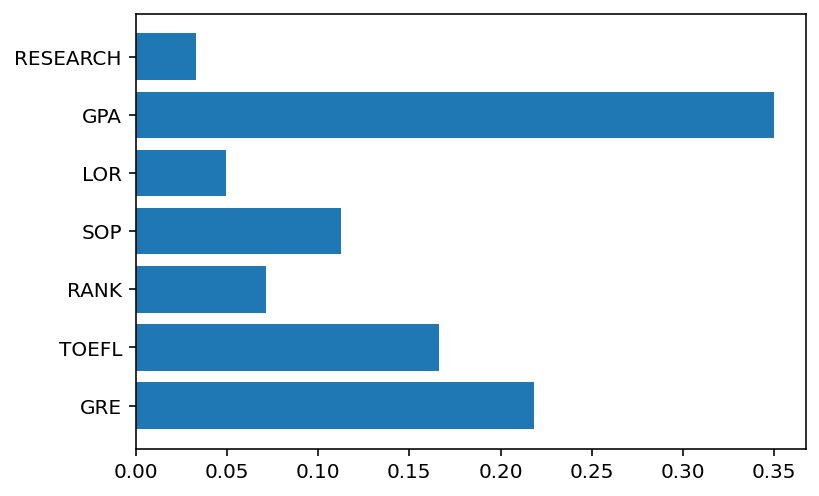

In [33]:
# Feature 중요도 확인
plt.barh(list(x), model.feature_importances_)
plt.show()

In [36]:
x.columns

Index(['GRE', 'TOEFL', 'RANK', 'SOP', 'LOR', 'GPA', 'RESEARCH'], dtype='object')

**5) XGBoost**

- XGBoost 알고리즘으로 모델링하고 성능을 확인합니다.

In [38]:
# 선언하기
model = XGBClassifier(max_depth=5,random_state=2022)

In [39]:
# 학습하기
model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=2022, reg_alpha=0, reg_lambda=1, ...)

In [40]:
# 예측하기
y_pred = model.predict(x_test)

In [41]:
# 평가하기
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[79  4]
 [12 55]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91        83
           1       0.93      0.82      0.87        67

    accuracy                           0.89       150
   macro avg       0.90      0.89      0.89       150
weighted avg       0.90      0.89      0.89       150



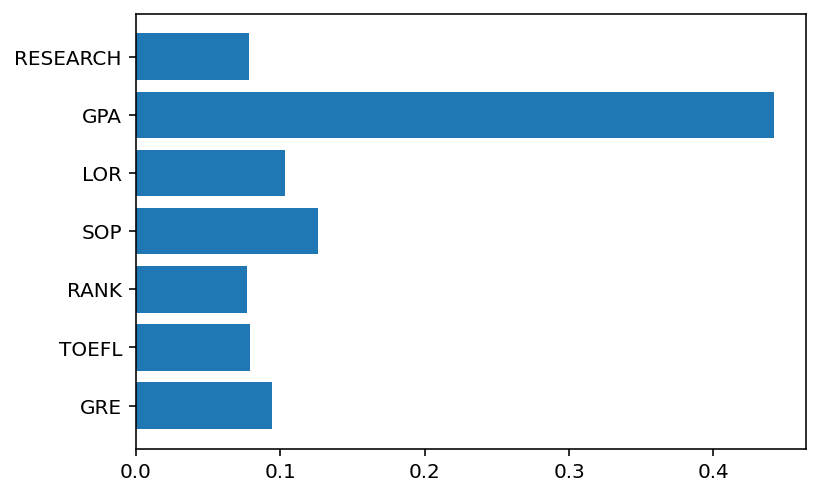

In [44]:
# Feature 중요도 확인
plt.barh(list(x),model.feature_importances_)
plt.show()

**6) LightGBM**

- LightGBM 알고리즘으로 모델링하고 성능을 확인합니다.

In [48]:
# 선언하기
model = LGBMClassifier(max_depth=5,random_state=2022)

In [49]:
# 학습하기
model.fit(x_train,y_train)

LGBMClassifier(max_depth=5, random_state=2022)

In [50]:
# 예측하기
y_pred = model.predict(x_test)

In [51]:
# 평가하기
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[79  4]
 [14 53]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90        83
           1       0.93      0.79      0.85        67

    accuracy                           0.88       150
   macro avg       0.89      0.87      0.88       150
weighted avg       0.89      0.88      0.88       150



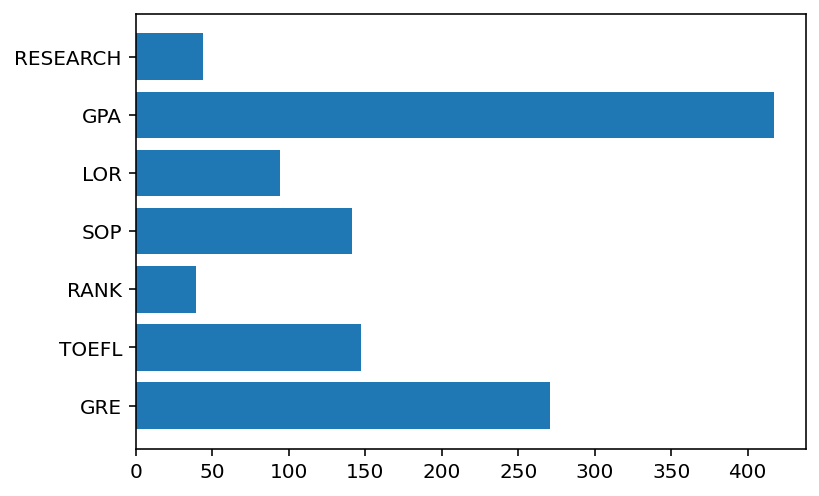

In [53]:
# Feature 중요도 확인
plt.barh(list(x),model.feature_importances_)
plt.show()